<a href="https://colab.research.google.com/github/Nwosu-Ihueze/project_005/blob/main/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks

For this task, we would be familiarizing ourselves with building a simple neural network
classifier on tensorflow using keras.

We would be working with the fashion_mnist dataset provided by tensorflow. The dataset
comprises images of the following given as an array of numbers ranging from 0 to 255
which represent pixel values.

● T-shirt/tops -1
● Trousers -2
● Pullover -3
● Dress - 4
● Coat - 5

● Sandal - 6
● Shirt - 7
● Sneaker - 8
● Bag -- 9
● Ankle boot - 0

The numbers in front of the image represent their labels(encoding), these labels are what
we would be classifying. So to know what image belongs to what label we have to create a
mapping of the labels to their respective images.

In [1]:
#Importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
#Loading dataset
data = keras.datasets.fashion_mnist

In [3]:
#Downloading dataset
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
#Scaling
train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
#Creating label dictionary
class_names = ['T-shirt/tops', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

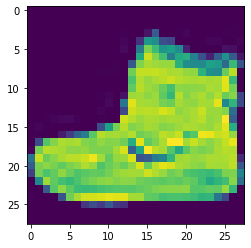

In [6]:
#Visualizing single
plt.imshow(train_images[0])

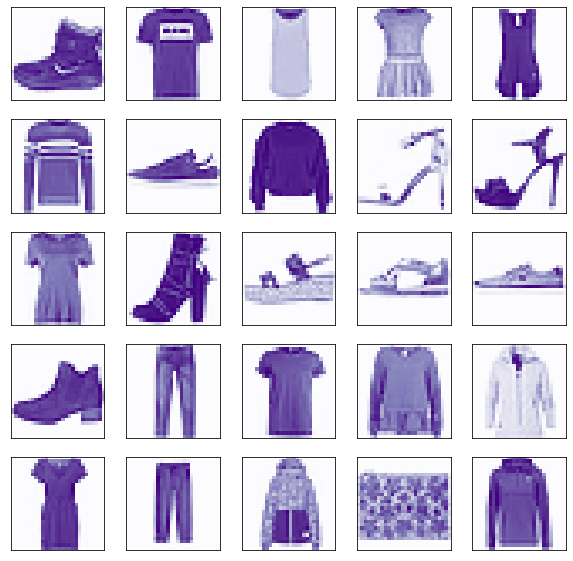

In [8]:
#Visualize random
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='Purples')

In [9]:
#Splitting dataset
x_train=train_images   
y_train=train_labels     
x_test=test_images
y_test=test_labels 

In [16]:
#Rescaling
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test=x_test.reshape(x_test.shape[0], 28, 28, 1)

In [18]:
#Importing model library
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dropout, Flatten ,Dense,BatchNormalization

In [28]:
#Build neural network
batch_size=128
epochs=10

model=Sequential()
model.add(layers.Conv2D(32, (3,3) , padding='same',activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [29]:
#Network summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [30]:
#Compile model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer='adam',
            metrics=['accuracy'] )

In [31]:
#Train model
history = model.fit(x_train ,y_train, epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4721 - accuracy: 0.8346
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2670 - accuracy: 0.9024
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2312 - accuracy: 0.9165
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.2057 - accuracy: 0.9249
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1857 - accuracy: 0.9324
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1606 - accuracy: 0.9406
Epoch 7/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1520 - accuracy: 0.9444
Epoch 8/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1360 - accuracy: 0.9500
Epoch 9/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1270 - accuracy: 0.9535
Epoch 10/10
1875/1875 [==============================] - 60s 32m

In [32]:
#Test accuracy
test_model =model.evaluate(x_test, y_test, verbose=2)

313/313 - 3s - loss: 0.2674 - accuracy: 0.9196


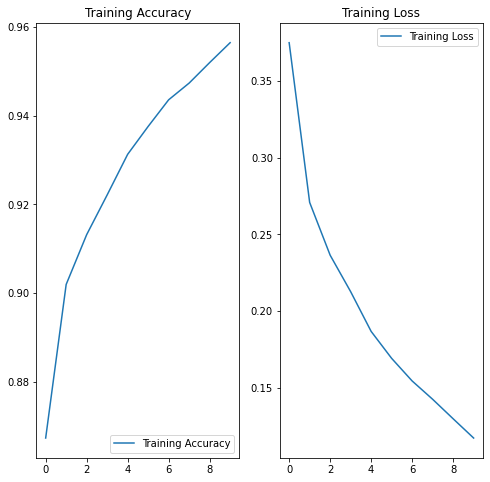

In [34]:
#Plot accuracy and loss
acc = history.history['accuracy']

loss = history.history['loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()